## Libraries used for the project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy.stats import linregress

from config import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)

lng_range = (-180, 180)

## code to get a list of cities

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

572

## Use of API to get data for each city

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
resp_json = []

In [4]:
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 - {cities[x]}")
    
    post_record = requests.get(url + "q=" + cities[x] + "&appid=" + weather_api_key)
    
    resp_json.append(post_record.json())

Processing Record 0 of Set 1 - kapaa
Processing Record 1 of Set 1 - busselton
Processing Record 2 of Set 1 - nanchong
Processing Record 3 of Set 1 - constantine
Processing Record 4 of Set 1 - jamestown
Processing Record 5 of Set 1 - hobart
Processing Record 6 of Set 1 - bur gabo
Processing Record 7 of Set 1 - shanhetun
Processing Record 8 of Set 1 - butaritari
Processing Record 9 of Set 1 - tasiilaq
Processing Record 10 of Set 1 - hilo
Processing Record 11 of Set 1 - saint-philippe
Processing Record 12 of Set 1 - cape town
Processing Record 13 of Set 1 - ramsar
Processing Record 14 of Set 1 - bluff
Processing Record 15 of Set 1 - kupang
Processing Record 16 of Set 1 - purwodadi
Processing Record 17 of Set 1 - san lorenzo
Processing Record 18 of Set 1 - ola
Processing Record 19 of Set 1 - georgetown
Processing Record 20 of Set 1 - qaanaaq
Processing Record 21 of Set 1 - luderitz
Processing Record 22 of Set 1 - terme
Processing Record 23 of Set 1 - illoqqortoormiut
Processing Record 24 o

Processing Record 198 of Set 1 - trogir
Processing Record 199 of Set 1 - charlestown
Processing Record 200 of Set 1 - ostrovnoy
Processing Record 201 of Set 1 - tiarei
Processing Record 202 of Set 1 - samalaeulu
Processing Record 203 of Set 1 - kruisfontein
Processing Record 204 of Set 1 - yulara
Processing Record 205 of Set 1 - san patricio
Processing Record 206 of Set 1 - tourlaville
Processing Record 207 of Set 1 - saleaula
Processing Record 208 of Set 1 - chinhoyi
Processing Record 209 of Set 1 - berlevag
Processing Record 210 of Set 1 - matli
Processing Record 211 of Set 1 - jiblah
Processing Record 212 of Set 1 - manzhouli
Processing Record 213 of Set 1 - sioux lookout
Processing Record 214 of Set 1 - iskateley
Processing Record 215 of Set 1 - portland
Processing Record 216 of Set 1 - hambantota
Processing Record 217 of Set 1 - yarim
Processing Record 218 of Set 1 - friesoythe
Processing Record 219 of Set 1 - yuzhou
Processing Record 220 of Set 1 - arcata
Processing Record 221 of

Processing Record 392 of Set 1 - fallon
Processing Record 393 of Set 1 - alamosa
Processing Record 394 of Set 1 - codrington
Processing Record 395 of Set 1 - tarudant
Processing Record 396 of Set 1 - aksu
Processing Record 397 of Set 1 - cajamarca
Processing Record 398 of Set 1 - fortuna
Processing Record 399 of Set 1 - campechuela
Processing Record 400 of Set 1 - sabang
Processing Record 401 of Set 1 - kundiawa
Processing Record 402 of Set 1 - coihaique
Processing Record 403 of Set 1 - monte san giovanni campano
Processing Record 404 of Set 1 - tawkar
Processing Record 405 of Set 1 - guerrero negro
Processing Record 406 of Set 1 - mathathane
Processing Record 407 of Set 1 - sola
Processing Record 408 of Set 1 - vengerovo
Processing Record 409 of Set 1 - matucana
Processing Record 410 of Set 1 - omsukchan
Processing Record 411 of Set 1 - falealupo
Processing Record 412 of Set 1 - wanning
Processing Record 413 of Set 1 - le port
Processing Record 414 of Set 1 - gigmoto
Processing Record

In [5]:
city = []
lat = []
lng = []
max_tmp = []
humi = []
cloud = []
wind_sp = []
country = []
date = []

url_2 = "http://api.openweathermap.org/data/2.5/weather?"
url_qry = f"{url}appid={weather_api_key}&q="

for citi in cities:
    citydata = requests.get(url_qry + citi).json()
    
    if citydata['cod'] != '404':
        city.append(citydata['name'])
        lat.append(citydata['coord']['lat'])
        lng.append(citydata['coord']['lon'])
        max_tmp.append(citydata['main']['temp_max'])
        humi.append(citydata['main']['humidity'])
        cloud.append(citydata['clouds']['all'])
        wind_sp.append(citydata['wind']['speed'])
        country.append(citydata['sys']['country'])
        date.append(citydata['dt'])



## Transform data to csv file and DataFrame 

In [6]:
city_dict = {
    "City": city,
    "Lat" : lat,
    "Lon" : lng,
    "Temp Max" : max_tmp,
    "Humidity" : humi,
    "Cloudiness" : cloud,
    "Wind Speed" : wind_sp,
    "Country" : country,
    "Date" : date
}
city_weath_df = pd.DataFrame(city_dict)

In [7]:
city_weath_df.to_csv('city_weather.csv', index=False)

In [8]:
city_weath_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,296.15,64,1,2.05,US,1613195174
1,Busselton,-33.6500,115.3333,300.98,38,0,2.88,AU,1613195174
2,Nanchong,30.7951,106.0847,289.32,65,94,2.04,CN,1613195174
3,Constantine,36.3650,6.6147,284.15,71,75,5.66,DZ,1613195174
4,Jamestown,42.0970,-79.2353,263.71,79,1,3.09,US,1613195175


In [9]:
city_weath_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,296.15,64,1,2.05,US,1613195174
1,Busselton,-33.6500,115.3333,300.98,38,0,2.88,AU,1613195174
2,Nanchong,30.7951,106.0847,289.32,65,94,2.04,CN,1613195174
3,Constantine,36.3650,6.6147,284.15,71,75,5.66,DZ,1613195174
4,Jamestown,42.0970,-79.2353,263.71,79,1,3.09,US,1613195175
...,...,...,...,...,...,...,...,...,...
521,Turukhansk,65.8167,87.9833,243.54,81,0,2.29,RU,1613195270
522,Kenora,49.8167,-94.4337,244.26,69,90,1.03,CA,1613195266
523,Tirumullaivāsal,11.2333,79.8333,299.66,65,87,3.94,IN,1613195271
524,Natal,-5.7950,-35.2094,298.15,88,20,2.57,BR,1613195060


## DataFrame to show the stats of the records

In [10]:
stat_city = city_weath_df.agg({'Lat':['count','mean','std','min','max'],
                               'Lon':['count','mean','std','min','max'],
                               'Temp Max':['count','mean','std','min','max'],
                               'Humidity':['count','mean','std','min','max'],
                               'Cloudiness':['count','mean','std','min','max'],
                               'Wind Speed':['count','mean','std','min','max'],
                               'Date':['count','mean','std','min','max']})
stat_city

,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,18.703333,14.924371,283.104810,74.077947,53.823194,3.551882,1.613195e+09
std,33.841618,92.389487,18.203395,19.780982,39.583175,2.748393,6.798963e+01
min,-54.800000,-175.200000,234.150000,12.000000,0.000000,0.150000,1.613195e+09
max,78.218600,178.416700,307.150000,100.000000,100.000000,21.490000,1.613195e+09


## Dropping cities with humidity above 100

In [11]:
out_index = city_weath_df.index[city_weath_df['Humidity'] > 100].tolist()
out_index

[]

In [12]:
new_city_df = city_weath_df.drop(out_index, inplace=False)
new_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,296.15,64,1,2.05,US,1613195174
1,Busselton,-33.6500,115.3333,300.98,38,0,2.88,AU,1613195174
2,Nanchong,30.7951,106.0847,289.32,65,94,2.04,CN,1613195174
3,Constantine,36.3650,6.6147,284.15,71,75,5.66,DZ,1613195174
4,Jamestown,42.0970,-79.2353,263.71,79,1,3.09,US,1613195175
...,...,...,...,...,...,...,...,...,...
521,Turukhansk,65.8167,87.9833,243.54,81,0,2.29,RU,1613195270
522,Kenora,49.8167,-94.4337,244.26,69,90,1.03,CA,1613195266
523,Tirumullaivāsal,11.2333,79.8333,299.66,65,87,3.94,IN,1613195271
524,Natal,-5.7950,-35.2094,298.15,88,20,2.57,BR,1613195060


## Stats for new DataFrame

In [13]:
stat_city = new_city_df.agg({'Lat':['count','mean','std','min','max'],
                               'Lon':['count','mean','std','min','max'],
                               'Temp Max':['count','mean','std','min','max'],
                               'Humidity':['count','mean','std','min','max'],
                               'Cloudiness':['count','mean','std','min','max'],
                               'Wind Speed':['count','mean','std','min','max'],
                               'Date':['count','mean','std','min','max']})
stat_city

,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,18.703333,14.924371,283.104810,74.077947,53.823194,3.551882,1.613195e+09
std,33.841618,92.389487,18.203395,19.780982,39.583175,2.748393,6.798963e+01
min,-54.800000,-175.200000,234.150000,12.000000,0.000000,0.150000,1.613195e+09
max,78.218600,178.416700,307.150000,100.000000,100.000000,21.490000,1.613195e+09


In [14]:
new_city_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,296.15,64,1,2.05,US,1613195174
1,Busselton,-33.6500,115.3333,300.98,38,0,2.88,AU,1613195174
2,Nanchong,30.7951,106.0847,289.32,65,94,2.04,CN,1613195174
3,Constantine,36.3650,6.6147,284.15,71,75,5.66,DZ,1613195174
4,Jamestown,42.0970,-79.2353,263.71,79,1,3.09,US,1613195175


# Plotting the Data

## Latitude vs. Temperature Plot

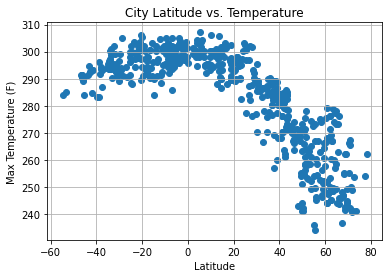

In [46]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,3])
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

## Latitude vs. Huimidity Plot

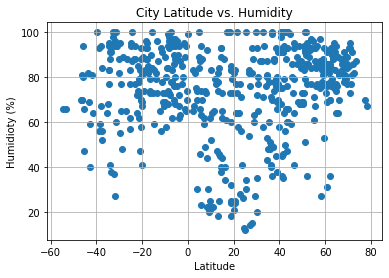

In [43]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,4])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidioty (%)')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

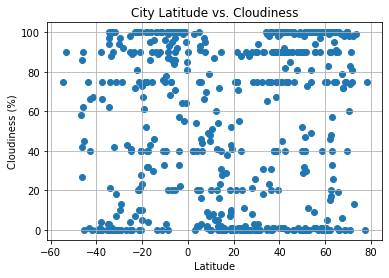

In [44]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,5])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

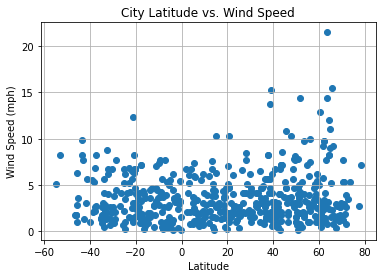

In [45]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,6])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

# Linear Regression

### Northern Hemisphere DataFrame

In [22]:
nh_city_df = new_city_df[new_city_df.Lat >= 0]
nh_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,296.15,64,1,2.05,US,1613195174
2,Nanchong,30.7951,106.0847,289.32,65,94,2.04,CN,1613195174
3,Constantine,36.3650,6.6147,284.15,71,75,5.66,DZ,1613195174
4,Jamestown,42.0970,-79.2353,263.71,79,1,3.09,US,1613195175
6,Shanhecun,44.7000,127.2000,271.82,99,85,3.65,CN,1613195175
...,...,...,...,...,...,...,...,...,...
518,Ogbomosho,8.1330,4.2500,295.37,92,2,0.78,NG,1613195270
521,Turukhansk,65.8167,87.9833,243.54,81,0,2.29,RU,1613195270
522,Kenora,49.8167,-94.4337,244.26,69,90,1.03,CA,1613195266
523,Tirumullaivāsal,11.2333,79.8333,299.66,65,87,3.94,IN,1613195271


### Southern Hemisphere DataFrame

In [23]:
sh_city_df = new_city_df[new_city_df.Lat < 0]
sh_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
1,Busselton,-33.6500,115.3333,300.98,38,0,2.88,AU,1613195174
5,Hobart,-42.8794,147.3294,292.59,59,40,7.72,AU,1613195175
10,Saint-Philippe,-21.3585,55.7679,303.15,62,0,12.35,RE,1613195176
11,Cape Town,-33.9258,18.4232,293.71,88,0,2.57,ZA,1613195045
13,Bluff,-46.6000,168.3333,291.48,70,58,1.79,NZ,1613195176
...,...,...,...,...,...,...,...,...,...
516,Ambon City,-3.6954,128.1814,305.15,62,40,6.17,ID,1613195269
517,Maningrida,-12.0667,134.2667,304.49,65,90,2.82,AU,1613195270
519,Santa Helena de Goiás,-17.8136,-50.5969,291.99,95,100,1.24,BR,1613195270
520,Porto Walter,-8.2686,-72.7439,295.24,98,87,0.39,BR,1613195270


### Northern Hemisphere Linear Regression

#### Max Temp vs. Latitude

The r-value is: 0.7609421118860146


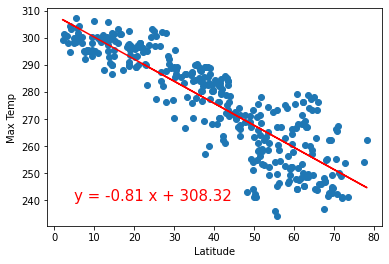

In [69]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(5,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Humidity (%) vs. Latitude

The r-value is: 0.14625021630368307


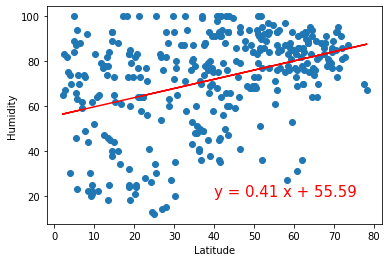

In [72]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Cloudiness (%) vs. Latitude

The r-value is: 0.079899888824555


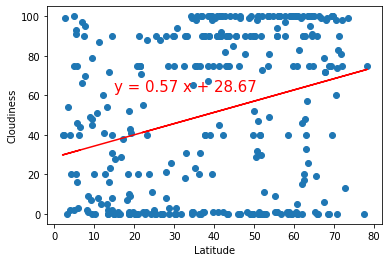

In [65]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(15,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Wind Speed (mph) vs. Latitude

The r-value is: 0.013936415420087523


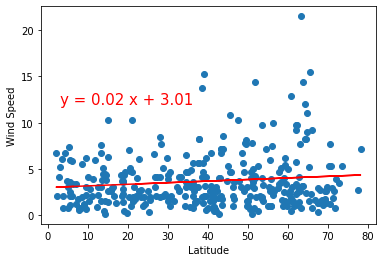

In [74]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(3,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue **2}")
plt.show()

### Southern Hemisphere Linear Regression

#### Max Temp vs. Latitude

The r-value is: 0.24563293542413847


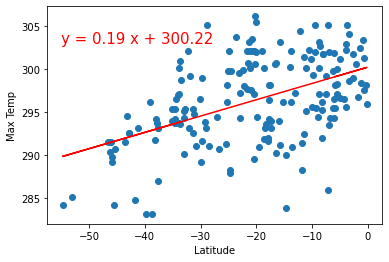

In [78]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,303),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Humidity (%) vs. Latitude

The r-value is: 0.038314795737764785


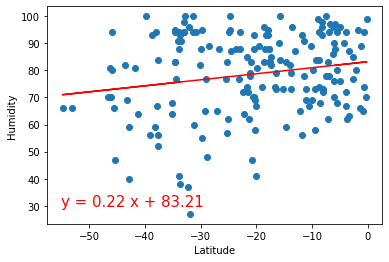

In [80]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Cloudiness (%) vs. Latitude

The r-value is: 0.10938767310018592


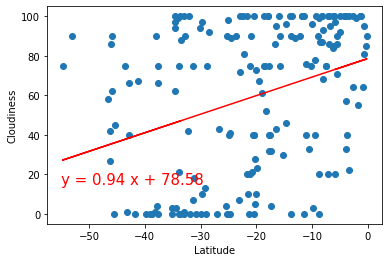

In [82]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregres#### Cloudiness (%) vs. Latitudes(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Wind Speed (mph) vs. Latitude

The r-value is: 0.030550231033553955


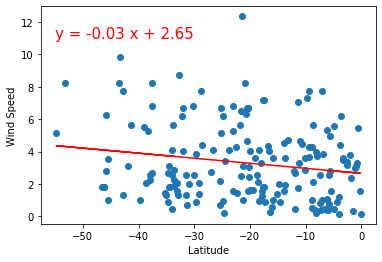

In [84]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()